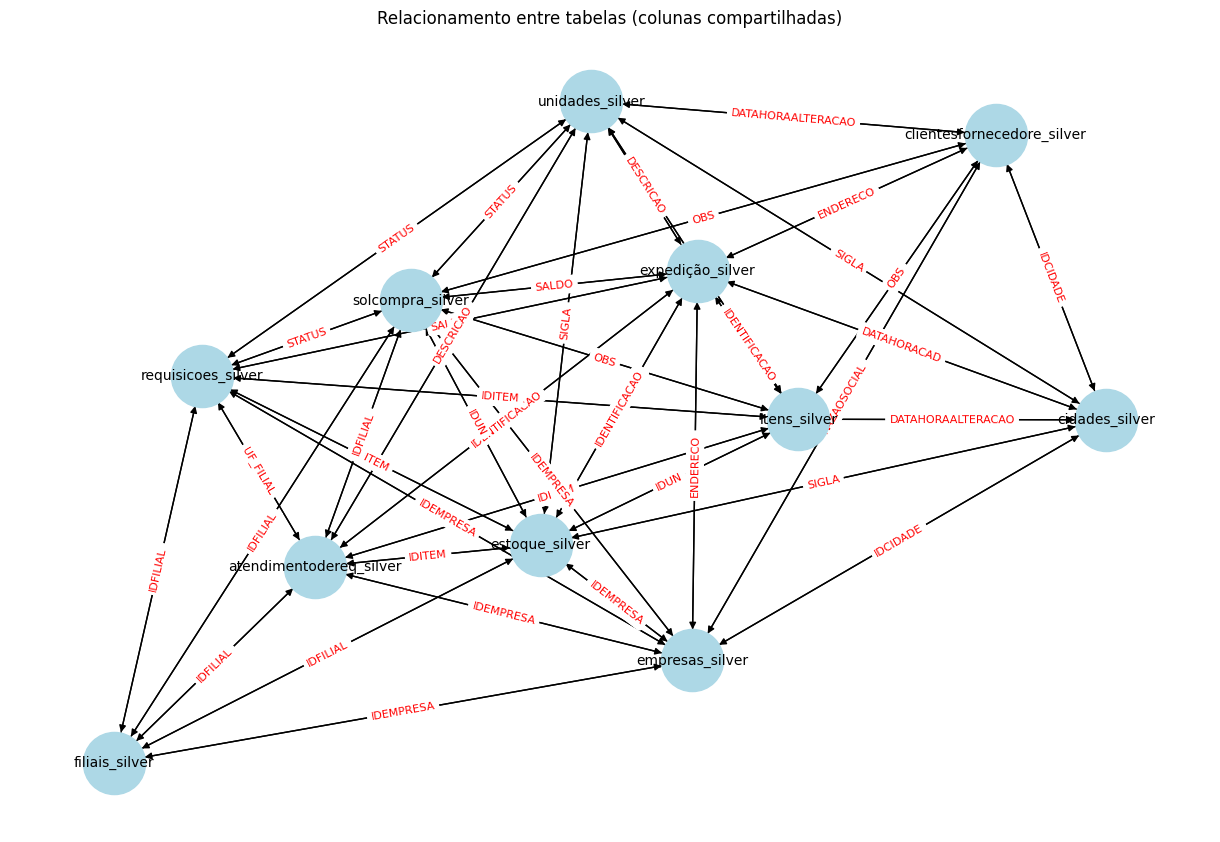

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Suponha que você tenha os dados em CSV
df = pd.read_csv("tabelas.csv", sep="\t", encoding="latin1")

# Identificar possíveis relações por colunas que aparecem em mais de uma tabela
column_tables = df.groupby("column_name")["table_name"].unique()

# Mantemos apenas colunas que aparecem em 2 ou mais tabelas
shared_columns = column_tables[column_tables.apply(lambda x: len(x) > 1)]

# Criar grafo
G = nx.DiGraph()

# Adiciona nós para cada tabela
for table in df["table_name"].unique():
    G.add_node(table)

# Adiciona arestas entre tabelas que compartilham coluna (relacionamento potencial)
for col, tables in shared_columns.items():
    tables = list(tables)
    for i in range(len(tables)):
        for j in range(i+1, len(tables)):
            G.add_edge(tables[i], tables[j], column=col)
            G.add_edge(tables[j], tables[i], column=col)  # opcional, para visual bidirecional

# Desenhar grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=10)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(u, v): d["column"] for u, v, d in G.edges(data=True)},
    font_color="red", font_size=8
)
plt.title("Relacionamento entre tabelas (colunas compartilhadas)")
plt.show()
